In [1]:
library(tidyverse)
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

DSCI 100 Individual Planning Report

(1) Data Description：

In this project, we use two datasets provided by the UBC research group studying a Minecraft server:

players.csv: One row per player, containing demographic and account-level information.

sessions.csv: One row per play session, containing information about when and how long each player was online.

In [2]:
glimpse(players)
summary(players)

glimpse(sessions)
summary(sessions)


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

As what shows above, there is 7 columns, 196 rows for players and 5 columns, 1535 rows for sessions. 
**players.csv** includes:
`experience` (categorical), `subscribe` (TRUE/FALSE), `hashedEmail`, `played_hours` (numeric), `name`, `gender`, and `Age`.  
There are 144 subscribers and 52 non-subscribers. `played_hours` ranges from 0 to 223.1 (right-skewed), and two missing `Age` values.  
This file captures *who the players are* and their total playtime.

**sessions.csv** includes:
`hashedEmail`, `start_time`, `end_time`, `original_start_time`, and `original_end_time`.  
Each player can have multiple sessions, with times recorded as character strings and numeric timestamps.  
There are two missing time entries.  
This file records *how players behave* in-game.

Before analysis, datasets must be merged by `hashedEmail`, timestamps converted to datetime, and missing values addressed.

(2) Questions

**Broad question:**  
What player characteristics and behaviors are most predictive of subscribing to the game-related newsletter?

**Specific predictive question:**  
Can a player’s experience level, total played hours, gender, and age predict whether they subscribe to the newsletter?


(3) Exploratory Data Analysis and Visualization:

In [6]:
players |>
  group_by(experience) |>
  summarise(mean_played = mean(played_hours, na.rm = TRUE))

experience,mean_played
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


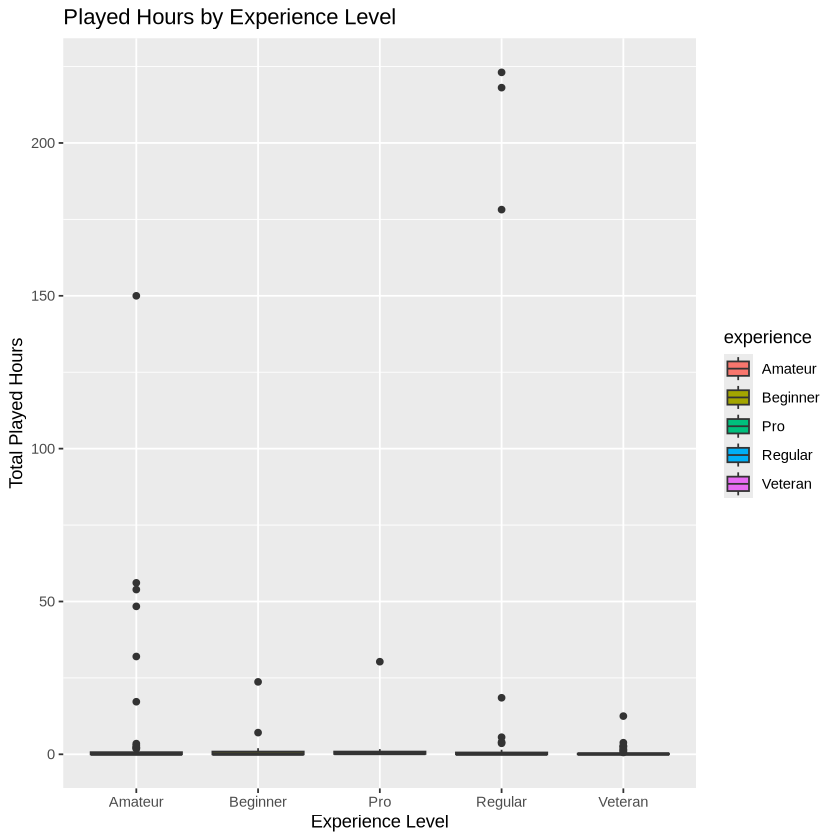

In [7]:
ggplot(players, aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot() +
  labs(title = "Played Hours by Experience Level",
       x = "Experience Level", y = "Total Played Hours")

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


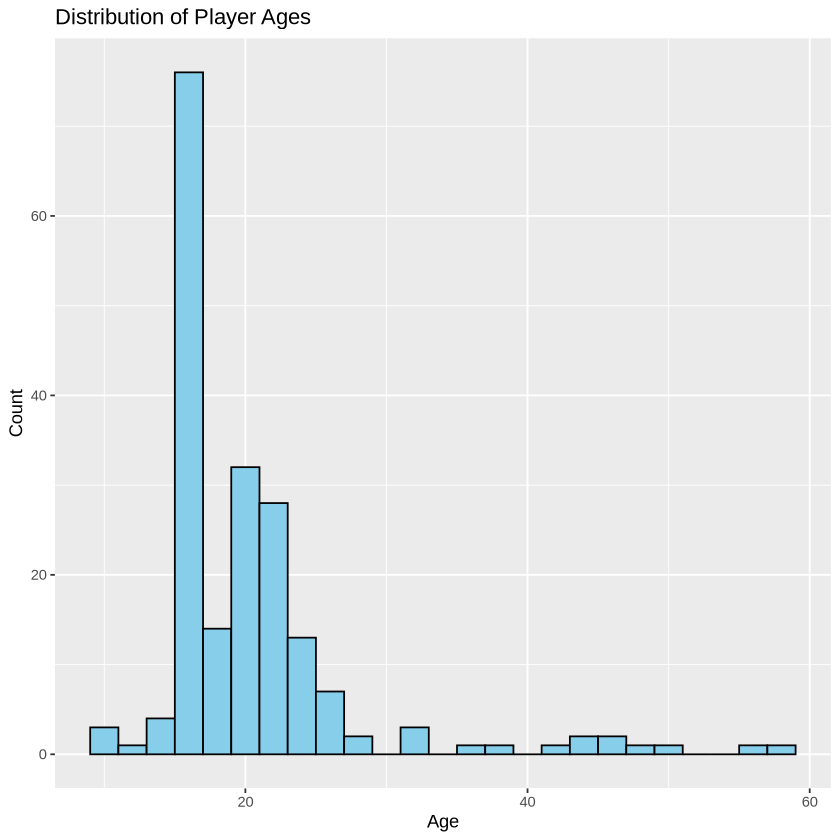

In [8]:
ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Player Ages",
       x = "Age", y = "Count")

From the exploratory plots, most players are concentrated in the 15–25 age range, with a few outliers up to around 55 years old.  
This indicates that the player base is primarily composed of younger participants.  
The distribution of total played hours shows a strong right skew, where a few “Pro” and “Veteran” players have extremely high total playtime, while most players across all experience levels play only a few hours.  
This suggests that engagement intensity varies sharply by experience and may be an important predictor of subscription behaviour.


(4) Methods and Plan：
To address the research question, I plan to use a **classification model** to predict whether a player subscribes to the newsletter based on their experience level, total played hours, age, and gender.  
A **logistic regression** model will first be applied for interpretability, followed by **k-nearest neighbours (k-NN)** to capture potential nonlinear relationships.  
Data will be pre-processed by encoding categorical variables, scaling numeric predictors, and merging player and session data using `hashedEmail`.  
The data will be split into 70% training and 30% testing sets, with 5-fold cross-validation for parameter tuning.  
Potential limitations include class imbalance and the small sample size (n = 196), which may affect generalizability.
